<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/classification_metrics_core_knn_logReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics

Name: Rahaf Hosari

### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [161]:
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Column Trasformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Column Transformer and Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Classification Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

### Load Data

1) Check for class balance with value_counts

In [73]:
path = '/content/drive/MyDrive/AXSOSACADEMY/02-IntroML/Week08/Classification Metrics/stroke.csv'
df = pd.read_csv(path)

In [74]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1085 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0


#### Duplicates

In [75]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

`There are no duplications in Dataset`

#### Null Values

In [76]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,52


`There are missing Values in BMI (float)`

--> Note understand the imputation startegy, we can draw a box plot for example, check if normally distributed or not


#### Inconsistencies

In [77]:
df.describe()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1137.000000,1137.000000,1137.000000,1137.000000,1085.000000,1137.000000
mean,36750.933157,0.118734,0.068602,107.664002,29.198065,0.120493
std,21112.281253,0.323617,0.252887,47.618723,7.669615,0.325680
min,77.000000,0.000000,0.000000,55.270000,11.300000,0.000000
25%,17986.000000,0.000000,0.000000,77.600000,24.100000,0.000000
50%,37479.000000,0.000000,0.000000,91.820000,28.500000,0.000000
75%,55410.000000,0.000000,0.000000,113.850000,33.200000,0.000000
max,72918.000000,1.000000,1.000000,266.590000,64.400000,1.000000


From describe check extreme values,
Id columns not necessarly important to add the ML model
any highly Unique columns to be dropped.

In case of extreme values --> two approaches
we can convert the value to empty (Not Number) then impute it late

- or replace it with specific value based on a specific justificiation.

Missing values in target are disregarded.

##### Object Columns

In [78]:
categorial_cols = df.select_dtypes(include='object').columns
categorial_cols.values

array(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'], dtype=object)

In [79]:
for column in categorial_cols:
  # print the value counts for the column
  count =  df[column].value_counts().sort_values(ascending=False)
  print(f"Value counts for {column} : {count}")
  print()

Value counts for gender : gender
Female    642
Male      494
Other       1
Name: count, dtype: int64

Value counts for age : age
79     26
78     24
57     24
52     23
55     22
       ..
46      7
69      7
12      6
4       6
*82     1
Name: count, Length: 84, dtype: int64

Value counts for ever_married : ever_married
Yes    769
No     368
Name: count, dtype: int64

Value counts for work_type : work_type
Private          672
Self-employed    174
children         147
Govt_job         142
Never_worked       2
Name: count, dtype: int64

Value counts for Residence_type : Residence_type
Urban    587
Rural    550
Name: count, dtype: int64

Value counts for smoking_status : smoking_status
never smoked       416
Unknown            352
formerly smoked    205
smokes             164
Name: count, dtype: int64



** Solve inconsistencies with captialized and dashes and other formulations ot enusre harmoney of data.

Inconsistencies observed in Age column
*82

In [80]:
df['age'] = df['age'].replace(to_replace='*82', value='82')

## make sure to convert column type from string to number
df['age'] = df['age'].astype(float)

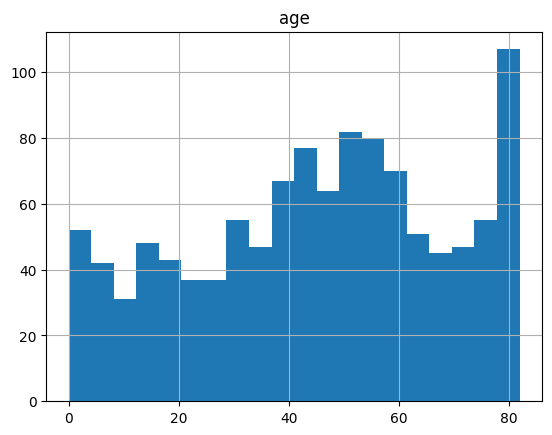

In [81]:
#To confirm Change
# df['age'].value_counts()

## instead of using value count we can draw the data
df.hist(column='age', bins=20);

No outliers or incinsistent plot

##### Gender column to be converted to Object type.

In [82]:
df['gender'] = df['gender'].astype(object)

#### Uniqueness

In [83]:
# prompt: unique values

for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print(f"Number of unique values in {col}: {df[col].nunique()}")
    print("-" * 20)

Unique values in id: [ 1192    77 59200 ... 59749 12109  5731]
Number of unique values in id: 1137
--------------------
Unique values in gender: ['Female' 'Male' 'Other']
Number of unique values in gender: 3
--------------------
Unique values in age: [31. 13. 18. 65.  4. 28. 64. 62. 26. 63. 50. 77.  1. 52. 24. 48. 45. 74.
  3. 17. 54. 55. 67. 35. 38. 81. 34. 44. 79. 56. 70. 30. 39. 29. 80. 59.
 51. 19. 43. 71.  0. 23. 53. 78. 66. 60. 76. 22.  6. 47.  2. 46. 11. 33.
 37. 49. 61. 75. 40.  8. 57. 12. 21. 41. 58. 27. 20. 68. 42.  5. 69.  9.
 36. 25. 82. 73. 32.  7. 16. 14. 72. 15. 10.]
Number of unique values in age: 83
--------------------
Unique values in hypertension: [0 1]
Number of unique values in hypertension: 2
--------------------
Unique values in heart_disease: [0 1]
Number of unique values in heart_disease: 2
--------------------
Unique values in ever_married: ['No' 'Yes']
Number of unique values in ever_married: 2
--------------------
Unique values in work_type: ['Govt_job' 'ch

## 1.Check for class balance with value_counts

In [84]:
df['stroke'].value_counts()

,count
stroke,
0,1000
1,137


In [85]:
df['stroke'].value_counts(normalize=True)

,proportion
stroke,
0,0.879507
1,0.120493


The specimen is unbalanced, indicating classes are not equally repesented. People with stroke are less than people without in this dataset.

NOTE Balance the Data of the X-train after the Train Test Split

## 2.Prepare a column transformer for preprocessing

### Train Test Split

In [122]:
# Separate X,y and train test split
target = 'stroke'
X = df.drop(columns=[target,'id'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
# Checking the class balance
y_train.value_counts(normalize=True).sort_index()

,proportion
stroke,
0,0.879108
1,0.120892


### Column Transformer

#### Categorial Columns

In [123]:
categorial_cols = X_train.select_dtypes('object').columns
categorial_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

Since there are no missing values in Categorial Columns no need for Simple Imputer.

##### One Hot Encoder

In [124]:
#OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

##### Pipeline for Categorial Features

In [125]:
#Display Nominal Pipline
nominal_pipeline = make_pipeline(ohe_encoder)
nominal_pipeline

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

-- > Make Tuple of pipeline
if it's only one feature there's no need for a pipeline.

#### Numerical Columns

In [126]:
numerical_cols = X_train.select_dtypes('number').columns
numerical_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [127]:
X_train[numerical_cols].isna().sum()

,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,40


In [128]:
# Summary stats
X_train[numerical_cols].describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,852.00,852.00,852.00,852.00,812.00
mean,45.31,0.12,0.08,108.22,29.20
std,22.78,0.32,0.26,48.18,7.49
min,0.00,0.00,0.00,55.27,11.30
25%,28.00,0.00,0.00,77.91,24.20
50%,47.50,0.00,0.00,92.14,28.60
75%,63.00,0.00,0.00,114.48,33.10
max,82.00,1.00,1.00,266.59,64.40


##### Mean Imputer

In [129]:
#Impute by mean
impute_mean = SimpleImputer(strategy='mean')

It is recommended to use Median, if there's a difference between the mean and median.
Since Mean is affected by outliers.


##### Standard Scaler

In [130]:
scaler = StandardScaler()

##### Pipeline for Numerical Features

In [131]:
numerical_pipeline = make_pipeline(impute_mean,scaler)
numerical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

#### Column Transformer

##### Categorial Tuple (Nominal)

In [132]:
categorial_tuple = ('categorial', nominal_pipeline, categorial_cols)
categorial_tuple

('categorial',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object'))

##### Numerical Tuple

In [133]:
numerical_tuple = ('numerical', numerical_pipeline, numerical_cols)
numerical_tuple

('numerical',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))

## 3.Build and fit a model pipeline with the preprocessor and a default decision tree classifer (use a random_state of 42)

### Column Transformer (Processor)

In [134]:
# Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([categorial_tuple,numerical_tuple],
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('categorial',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                  verbose_feature_names_out=False)

### Decision Tree Classifier

In [135]:
# Instantiate a default decision tree
dec_tree = DecisionTreeClassifier(random_state = 42)

--> Know the specification of the model chosen, such KNN or the decision tree. And Why it's used.

### Pipeline ( Column Transformer + Decision Tree)

In [136]:
dec_tree_pipeline = make_pipeline(preprocessor,dec_tree) ## Add the SMOTE to the Classification Pipeline
dec_tree_pipeline
## This is classification Pipeline we can also call it clf_pipeline,
## which combines the column transformer and the classification decision tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

### Fit Data

In [137]:
dec_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## 4.Evaluate the classification model using the custom function to produce the confusion matrix and classification report.

### Make predictions for training and testing data


In [138]:
# train_preds = dec_tree_pipeline.predict(X_train)
# test_preds = dec_tree_pipeline.predict(X_test)
# test_preds

The values represent 0 and 1, since 0 No stroke and 1 troke

In [139]:
# Calculate classification accuracy
# train_score = accuracy_score(y_train, train_preds)
# test_score = accuracy_score(y_test, test_preds)
# print (f'The training accuracy is {train_score}.')
# print (f'The testing accuracy is {test_score}.')

In [140]:
# Define the predicted values
y_pred_train = dec_tree_pipeline.predict(X_train)
y_pred_test = dec_tree_pipeline.predict(X_test)

In [141]:
# Obtain the accuracy score
train_acc = accuracy_score(y_pred_train, y_train)
test_acc = accuracy_score(y_pred_test, y_test)

# Print the results
print(f'Training accuracy : {round(train_acc,2)}.')
print(f'Testing accuracy  : {round(test_acc,2)}.')

Training accuracy : 1.0.
Testing accuracy  : 0.81.


Explanation on Accuracy
- The model has perfectly learned the training data.
- While the model fits the training data perfectly, it struggles to generalize to new data as the accuracy for test is 82%.
- These results suggest in Overfitting, since the data initially is unbalanced for Stroke.

--> If the data was balanced using SMOTE, we can rely on the Accuracy.



### Confusion Matrix

In [142]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[223,  28],
       [ 25,   9]])

In [143]:
# Convert confusion matrix to dataframe
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,223,28
1,25,9


#### Plot Confusion Matrix

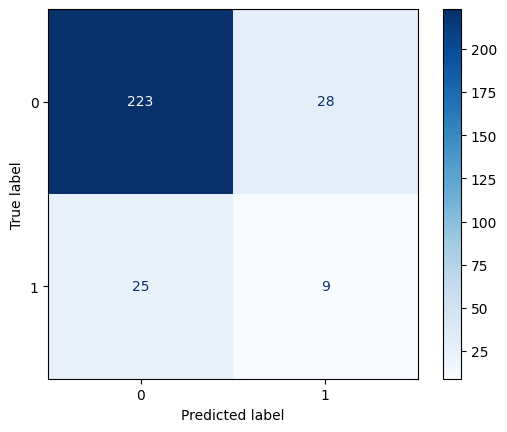

In [144]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues');

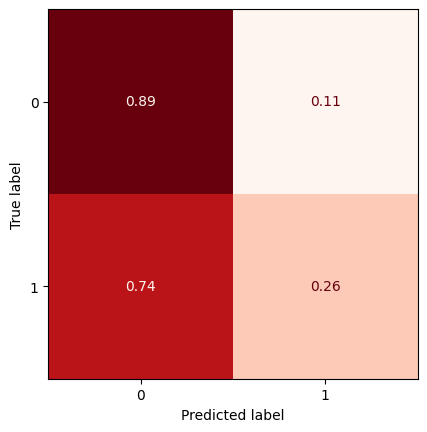

In [145]:
# Plot the confusion matrix from the predictions
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,normalize='true',
                                        #xticks_rotation=45,
                                        colorbar=False,
                                        cmap='Reds')

### Classification Report

#### Classification Helper Function

##### Classification Metrics

In [146]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

##### Calssification Evaluation

In [147]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

### Regression Report

#### Regression Helper Function

In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  # rmse = mean_squared_error(y_true, y_pred, squared=False)
  rmse = mean_squared_error(y_true, y_pred)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

In [225]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

#### Classification Report

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       103

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



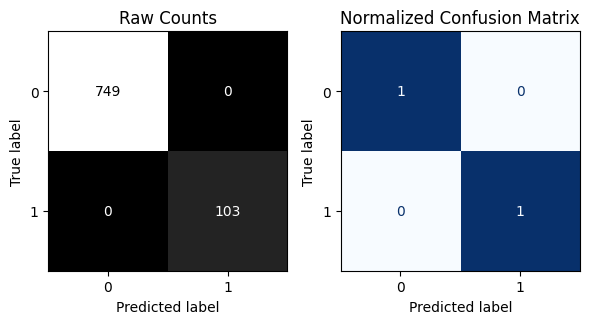


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       251
           1       0.24      0.26      0.25        34

    accuracy                           0.81       285
   macro avg       0.57      0.58      0.57       285
weighted avg       0.82      0.81      0.82       285



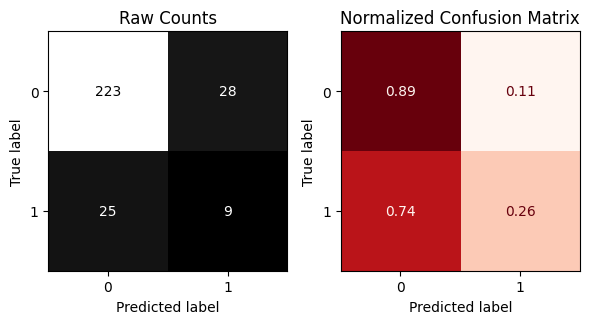

In [148]:
results = evaluate_classification(dec_tree_pipeline,X_train, y_train, X_test, y_test,output_dict=True)

# What needs to be done is to Balance the Data (maybe using SMOT) before processing.
TODO : Ask Nour about it.

Dealing with Unbalance classes, https://learn.axsos.academy/courses/take/Introduction-ml-bootcamp/texts/56123329-dealing-with-unbalanced-classes

## Answers

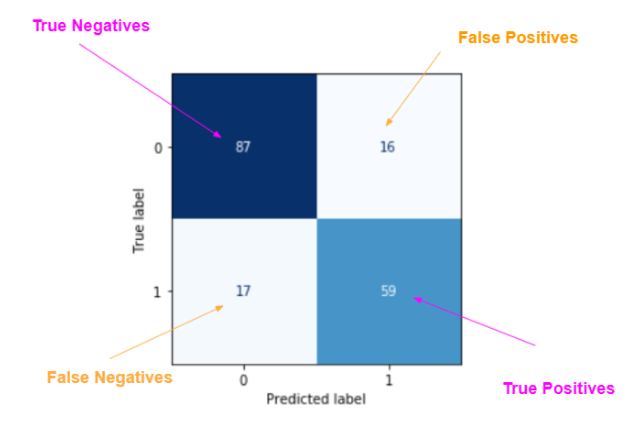

1. What was the overall accuracy of the model? (How would you describe the default model's performance considering the accuracy and class balance?)




```
Training accuracy : 1.0.
Testing accuracy  : 0.82.
```



```
The data is imbalanced towards the Majority (0 : No Stroke) 1000 entry, Minortiy (1: stroke) 137 entry.
-This affects how the model learns and performs for the minortiy class.

- Overfitting:
Training performance is perfect, but test performance drops significantly, especially for the minority class.

- Poor Generalization for Minority Class:
The model heavily favors the majority class, likely due to insufficient learning from the minority class, even with SMOTE applied.
```

2. Using this model, what percentage of the predictions would cause an unnecessary stroke alert for a patient who did not end up having a stroke? (A false positive)?




```
Depending on the graph above for test data it's 12%.
12% of the prediction would cause unnecessary stroke alerts for patients who did not end up having a stroke.
```



3. Using this model, what percentage of the predictions would miss warning a patient who ended up having a stroke (False Negatives)


```
Depending on the confusion matrix plot from the Classification evlauation
68% of the predictions would miss warning a patient who ended up having a stroke.
```

4. Considering that this dataset is used to identify strokes, which metric do you think would be important to optimize? Why?

```
Recall : As recall measures how many correct postive predciton did the model make
```

* Reason: Missing a stroke case (False Negative) could result in severe consequences, including disability or death, due to lack of timely medical intervention. Therefore, the priority is to correctly identify as many stroke cases as possible, even at the expense of more False Positives (unnecessary alerts).

```
Precision: measures how many correct prediction it makes
```
redusing False Postive imporves precision.

Reason: While False Positives (unnecessary alerts) are less critical than False Negatives, they can cause unnecessary stress, diagnostic costs, and resource strain. Precision ensures the system maintains credibility and avoids excessive false alarms.

--> Metrics
--> Cleaning

# Logestic Regression


## a) Start by creating and evaluating a default logistic regression model using appropriate metrics and a confusion matrix.

## Import for Log. Regression

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)

## Pipeline for Log. Regression

In [151]:
# Create pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(C=1000))])

## Fit Data to Model

In [152]:
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(C=1000))])

## Logistic Regression Report

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       749
           1       0.50      0.17      0.25       103

    accuracy                           0.88       852
   macro avg       0.70      0.57      0.59       852
weighted avg       0.85      0.88      0.85       852



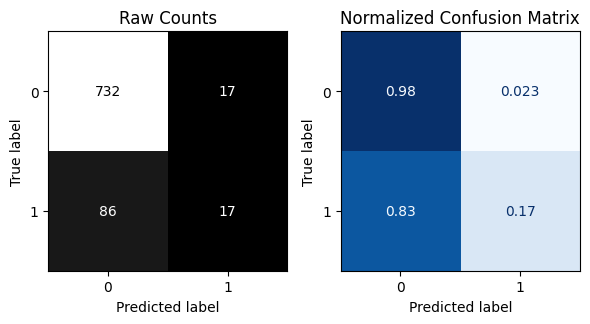


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       251
           1       0.22      0.06      0.09        34

    accuracy                           0.86       285
   macro avg       0.55      0.52      0.51       285
weighted avg       0.81      0.86      0.83       285



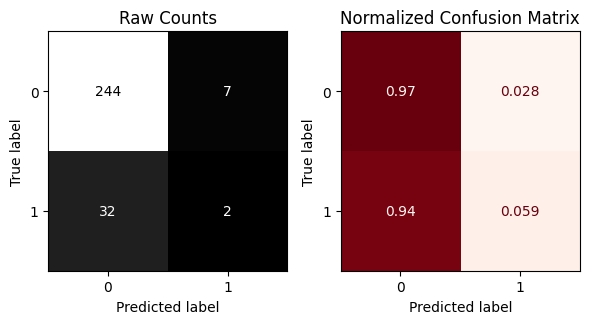

In [153]:
log_reg_results = evaluate_classification(logreg_pipe,X_train, y_train, X_test, y_test,output_dict=True)

## Grid Search to Tune the Logistic Regression (Regularization)

### 1. Heatmap to see if there's high correlation between features

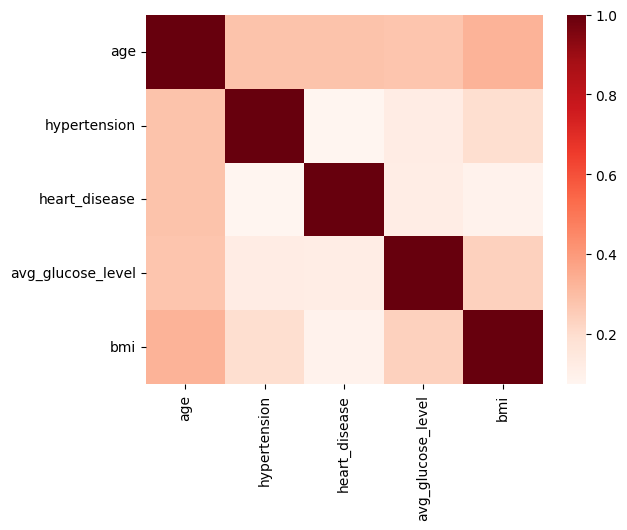

In [156]:
# Getting the absolute values of correlation matrix
X_train_corr = X_train.select_dtypes(include=np.number).corr().abs()
sns.heatmap(X_train_corr, cmap='Reds');

Data is not highly correlated

### How many features are there

In [159]:
X_train.shape
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 72 to 1126
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             852 non-null    object 
 1   age                852 non-null    float64
 2   hypertension       852 non-null    int64  
 3   heart_disease      852 non-null    int64  
 4   ever_married       852 non-null    object 
 5   work_type          852 non-null    object 
 6   Residence_type     852 non-null    object 
 7   avg_glucose_level  852 non-null    float64
 8   bmi                812 non-null    float64
 9   smoking_status     852 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 73.2+ KB


We only have 10 features in this data set.

In [162]:
logreg_pipe.get_params()

* 'logisticregression__C': 1000,
* 'logisticregression__penalty': 'l2',

## Tuning : GridSeach CV
3 folds

## Pipeline for LogReg for Gridsearch

In [197]:
log_reg_tune = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced')

In [198]:
logreg_tune_pipeline = make_pipeline(preprocessor, log_reg_tune)
logreg_tune_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [199]:
# Params compatible with penality='elasticnet'
elasticnet_params = {'logisticregression__solver' : ['saga'],
               'logisticregression__penalty' : ['elasticnet'],
                'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# Params compatible with penality='l2'
l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }
# Params compatible with penality='l1'
l1_params = {'logisticregression__solver' : ['liblinear', 'saga'],
               'logisticregression__penalty' : ['l1'],
                'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}
# Params with no penality
none_params = {'logisticregression__solver' : ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag', 'saga'],
               'logisticregression__penalty' : [None]}
# class_weight_params = {'logisticregression__class_weight': [None, 'balanced']}

# Now make a list of the param dictionaries
param_grid = [l2_params, l1_params, elasticnet_params, none_params]

In [200]:
# Instantiate gridsearch
gs = GridSearchCV(logreg_pipe, param_grid, verbose = 5, n_jobs = -1,cv=3, scoring='recall_macro')

# Fit the gs on the training data only
gs.fit(X_train, y_train)
gs.best_params_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'logisticregression__C': 10,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

```
Fitting 3 folds for each of 80 candidates, totalling 240 fits
{'logisticregression__C': 10,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}
 ```

## Predict

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       251
           1       0.22      0.06      0.09        34

    accuracy                           0.86       285
   macro avg       0.55      0.52      0.51       285
weighted avg       0.81      0.86      0.83       285



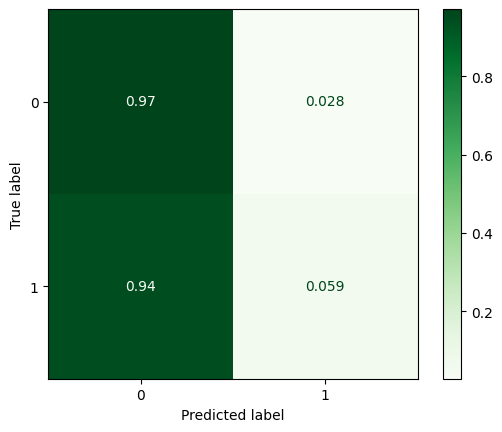

In [201]:
test_preds = gs.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',cmap='Greens');

## Which combination of hyperparameters led to the best-tuned model?

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       749
           1       0.50      0.17      0.25       103

    accuracy                           0.88       852
   macro avg       0.70      0.57      0.59       852
weighted avg       0.85      0.88      0.85       852



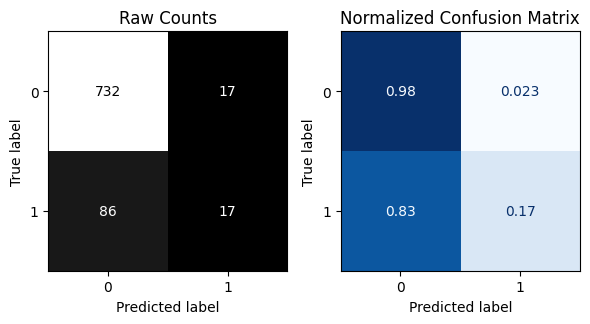


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       251
           1       0.22      0.06      0.09        34

    accuracy                           0.86       285
   macro avg       0.55      0.52      0.51       285
weighted avg       0.81      0.86      0.83       285



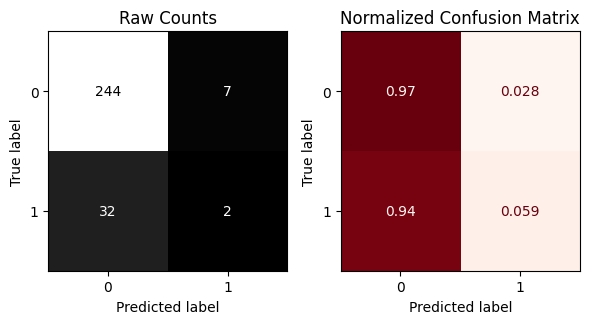

In [202]:
# Evalaute the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, X_train, y_train, X_test, y_test)

# KNN

## Import for KNN

In [203]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
# Instantiate default KNN
knn = KNeighborsClassifier()

## Pipeline for KNN

In [206]:
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe

## Fit Data

In [207]:
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

## KNN Report

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       749
           1       0.67      0.25      0.37       103

    accuracy                           0.89       852
   macro avg       0.79      0.62      0.65       852
weighted avg       0.88      0.89      0.87       852



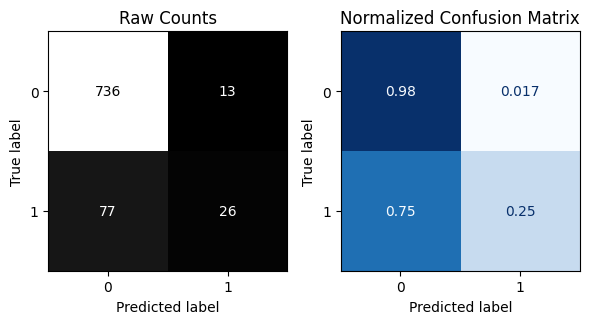


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       251
           1       0.22      0.06      0.09        34

    accuracy                           0.86       285
   macro avg       0.55      0.52      0.51       285
weighted avg       0.81      0.86      0.83       285



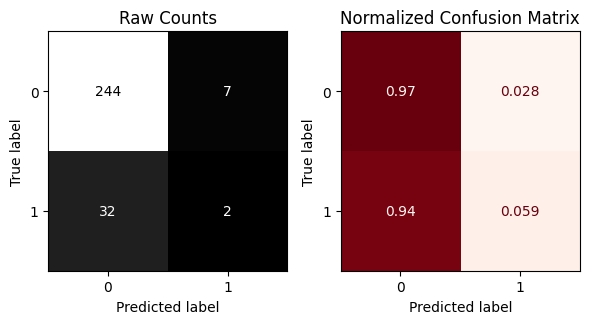

In [208]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

## Tuning : Finding Best K using GridSearch

In [209]:
#Making every other value from the range (odd values)
nneighbors_list = list(range(1,33,2))
nneighbors_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [210]:
# # Get list of params for the knn model pipeline
# knn_pipe.get_params()

In [211]:
# Create param grid
params_knn={'kneighborsclassifier__n_neighbors': nneighbors_list}

In [212]:
# Instaniate GridSearchCV
gs_knn = GridSearchCV(knn_pipe, params_knn, verbose=True, n_jobs=-1,cv=3, scoring='recall_macro')

# Fit gs on training data
gs_knn.fit(X_train, y_train)
# Obtain best param value for K
gs_knn.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'kneighborsclassifier__n_neighbors': 9}

```
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'kneighborsclassifier__n_neighbors': 9}
```

## Evaluate KNN after tuning

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       749
           1       0.74      0.17      0.27       103

    accuracy                           0.89       852
   macro avg       0.82      0.58      0.61       852
weighted avg       0.88      0.89      0.86       852



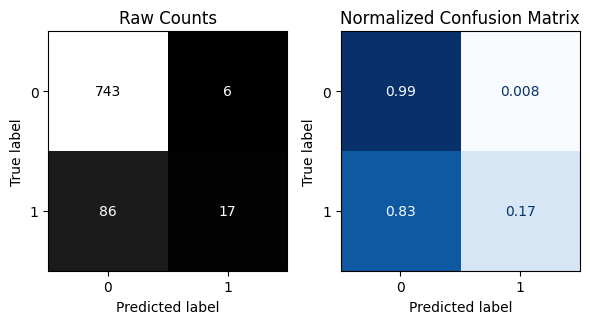


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       251
           1       0.00      0.00      0.00        34

    accuracy                           0.87       285
   macro avg       0.44      0.49      0.46       285
weighted avg       0.77      0.87      0.82       285



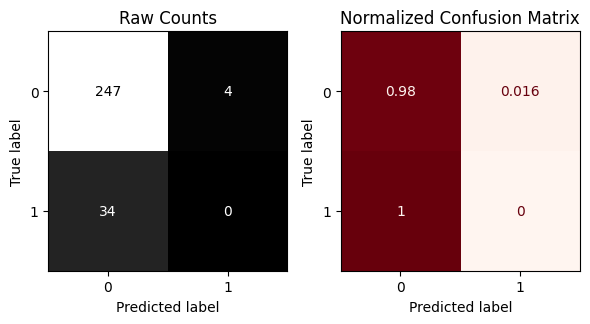

In [213]:
# Evalaute the best model
best_knn = gs_knn.best_estimator_
evaluate_classification(best_knn, X_train, y_train, X_test, y_test)


# Random Forest

## Random Forest import

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
# Instantiate default random forest model
rf = RandomForestClassifier(random_state=42)

## Pipeline for Random Forest

In [236]:
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

## Fit Data Random Forest

In [237]:
# Fit the model on the training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## Random Forest Report

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       103

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



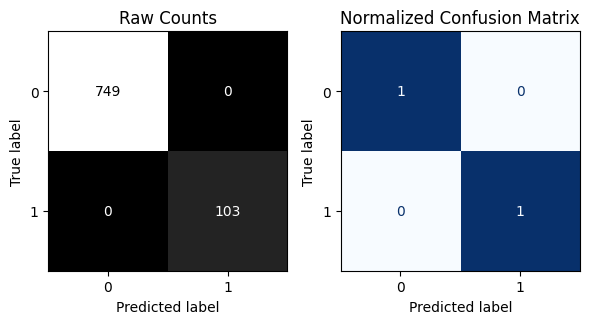


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       251
           1       0.33      0.06      0.10        34

    accuracy                           0.87       285
   macro avg       0.61      0.52      0.52       285
weighted avg       0.82      0.87      0.83       285



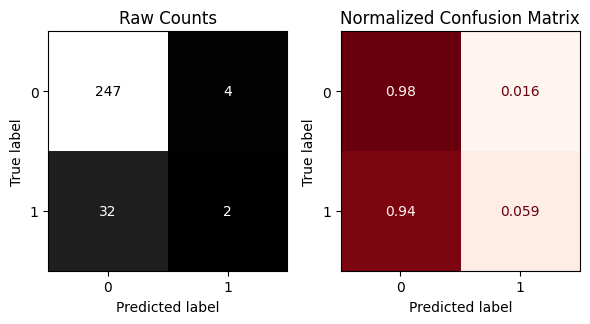

In [238]:
# Obtain evaluation metrics using custom function

evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

In [239]:
# Use custom function to evaluate default model
# evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

## Tuning : RandomForest Classifier

In [248]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('categorial',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status'],
         dtype='object')),
                                   ('numerical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                     ver

In [249]:
# Define param grid with options to try
params_ran_forest = {'randomforestclassifier__max_depth': [None,10,15,20],
          'randomforestclassifier__n_estimators':[10,100,150,200],
          'randomforestclassifier__min_samples_leaf':[1,2,3,4],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],
          }

In [250]:
# Instaniate GridSearchCV
gs_ranForest = GridSearchCV(rf_pipe, params_ran_forest, verbose=True, n_jobs=-1,cv=3, scoring='recall_macro')

# Fit gs on training data
gs_ranForest.fit(X_train, y_train)
# Obtain best param value for K
gs_ranForest.best_params_

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 150,
 'randomforestclassifier__oob_score': True}

```
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 150,
 'randomforestclassifier__oob_score': True}
 ```

In [252]:
# Obtain best parameters
gs_ranForest.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 150,
 'randomforestclassifier__oob_score': True}

## Evaluate RF after tuning

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       103

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



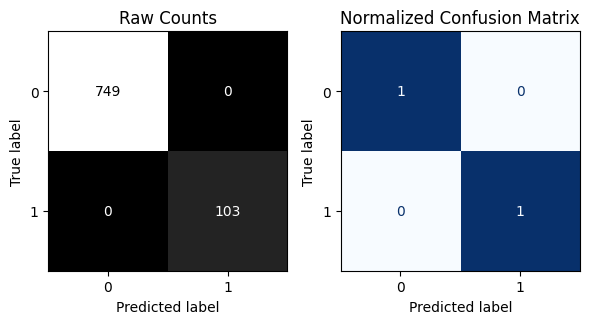


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       251
           1       0.23      0.09      0.13        34

    accuracy                           0.86       285
   macro avg       0.56      0.52      0.52       285
weighted avg       0.81      0.86      0.83       285



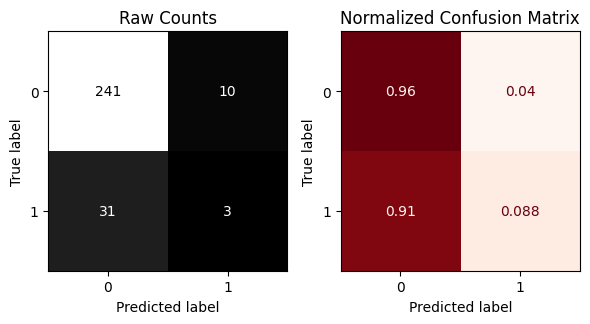

In [255]:
# Define and refit best model
best_rf = gs_ranForest.best_estimator_
evaluate_classification(best_rf, X_train, y_train, X_test, y_test)